## The Haar scaling function 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The Haar scaling function is a piecewise constant function 
# defined in the interval [0,1] only
def Haar_mother_scaling(x):
    eps=0.02
    return np.piecewise(x, [x<=0+eps, (x>0+eps) * (x < 1-eps), x >= 1-eps], [0,1, 0])

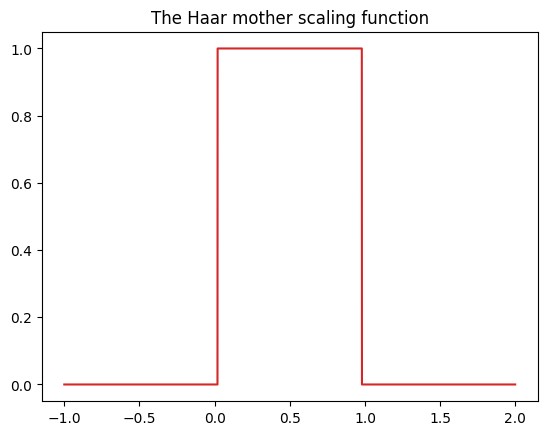

In [3]:
x_vec = np.arange(-1.0, 2.0, 0.001)
s_vec = [Haar_mother_scaling(x) for x in x_vec]
plt.title("The Haar mother scaling function")
plt.plot(x_vec, s_vec, "tab:red") 
plt.show()

In [1]:
# the mother scaling function can be scaled and translated to cover smaller intervals, i.e. increase resolution
# phi_^n_l(x) = np.sqrt(2**n) *phi(2**n x -l)
def Haar_scaling(n,l,x): 
    return np.sqrt(2**n)* Haar_mother_scaling(2**n *x -l)

### Exercise 1

Plot the Haar scaling functions on scale n=1 and scale n=2. What values may the translation index l assume for a given n?

## The Haar wavelet

In [6]:
# The Haar wavelet  is the defined in the interval [0,1] only
def Haar_father_wavelet(x):
    eps=0.02
    return np.piecewise(x, [x<=0+eps, (x>0+eps) * (x < 0.5),(x>0.5) * (x < 1.0-eps), x >= 1-eps], [0,1,-1, 0])

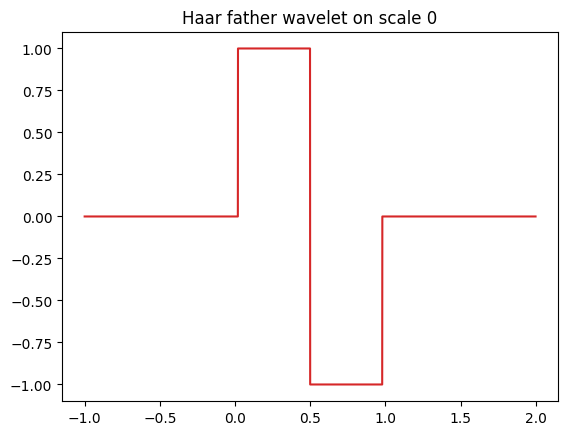

In [9]:
w_vec = [Haar_father_wavelet(x) for x in x_vec]
plt.title("Haar father wavelet on scale 0")
plt.plot(x_vec, w_vec, "tab:red") 
plt.show()

### Exercise 2

Plot the Haar scaling function with n=1, l=0.  Plot the Haar scaling function with n=0, l=0  plus the Haar wavelet with n=0, l=0. Compare. Repeat with the difference of the scaling function and its wavelet.

## Legendre functions

A generalization of the Haar scaling and waveler functions is obtained by extending the basis to a set of polynomials up to order $k$ ($k=0$ is the Haar function, and e.g. $k=4$ includes up to cubic functions).

In principle any set of orthonormal polynomial can be used. In practice there are two common choices. One is the Legendre polynomials and the other is the Interpolating polynomials. Although the two choices are formally equivalent, the Interpolating polynomials provide a more efficient implementation: each of them is zero in all but one quadrature point (different for each function). Operations such as projections and function multiplications ae then greatly simplified.

In this last part of the exercize you should familiarize with the Interpolating and Legendre scaling functions and corresponding wavelets.

Questions:
- How do Legendre scaling functions change when the order $k$ is increased?
- How do Interpolating scaling functions change when the order $k$ is increased?
- How do Legendre and Interpolating scaling functions change when the order $k$ is increased?
- Is there a difference between the 

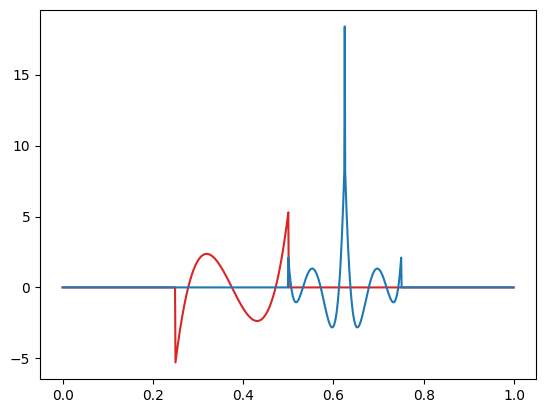

In [12]:
from vampyr import LegendreBasis, InterpolatingBasis
import matplotlib.pyplot as plt
import numpy as np

# Create Legendre basis of order 4 and Interpolating basis of order 3
legendre_4 = LegendreBasis(order=4)
interpol_3 = InterpolatingBasis(order=3)

#selects a given scaling function from the interpolating basis of order 3 (k=2)
index = 3
scale = 2
translation = 1
scaling_basis = legendre_4.scaling
scaling_fcn = scaling_basis(i=index, l=translation, n=scale)

#selects a given wavelet function from the legendre basis of order 4 (k=3)
index = 3
scale = 2
translation = 2
wavelet_basis = legendre_4.wavelet
wavelet_fcn = wavelet_basis(i=index, l=translation, n=scale)

x_vec = np.arange(0.0, 1.0, 0.001)
s_vec = [scaling_fcn([x]) for x in x_vec]
w_vec = [wavelet_fcn([x]) for x in x_vec]

plt.plot(x_vec, s_vec, "tab:red") # your projected function
plt.plot(x_vec, w_vec, "tab:blue") # your projected function

plt.show()